In [4]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import xgboost as xgb

In [5]:
def read_background_file(root_file_path):
    with uproot.open(root_file_path) as root_file:
        event_tree = root_file["event_tree"]
        hit_tree = root_file["hit_tree"]
        photons_tree = root_file["arrival_photons_tree"]

        total_optical_photons = event_tree["total_optical_photons"].array()
        total_thermal_electrons = event_tree["total_thermal_electrons"].array()

        hit_times = hit_tree["hit_times"].array()
        hit_total_energy_deposits = hit_tree["hit_total_energy_deposit"].array()
        hit_energy_deposits = hit_tree["hit_energy_deposits"].array()
        hit_position_x = hit_tree["hit_position_x"].array()
        hit_position_y = hit_tree["hit_position_y"].array()
        hit_position_z = hit_tree["hit_position_z"].array()

        sensor_count = photons_tree["sensor_count"].array()

        return total_optical_photons, total_thermal_electrons, hit_times, hit_total_energy_deposits, sensor_count, hit_position_x, hit_position_y, hit_position_z, hit_energy_deposits
    

In [6]:
base_path = "/home/lane/Software/src/lumilar/system/data/"

file_names = [
    "marley_HEP_CC",
]

data_dict = {}

for name in file_names:
    path = f"{base_path}{name}.root"
    data = read_background_file(path)
    
    data_dict[name] = {
        'photons': data[0],
        'electrons': data[1],
        'times': data[2],
        'energy': data[3],
        'sensor_count': data[4],
        'x' : data[5],
        'y' : data[6],
        'z' : data[7],
        'energy_deposits' : data[8]
    }

In [26]:
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

def plot_event_display(data_dict, event_name, event_index):
    mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    mpl.rc('text', usetex=True)
    
    fig = plt.figure(figsize=(12, 10))
    gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])  # 5:1 ratio for main plot to histogram

    ax = plt.subplot(gs[0])  # Main scatter plot

    x = np.asarray(data_dict[event_name]['x'][event_index])
    y = np.asarray(data_dict[event_name]['y'][event_index])
    z = np.asarray(data_dict[event_name]['z'][event_index])
    energy = np.asarray(data_dict[event_name]['energy_deposits'][event_index])
    s = (np.array(energy) / np.max(energy)) * 100

    ax.scatter(z, y, facecolors='none', edgecolors='blue', s=s, marker='s')
    ax.set_xlabel('Z-plane [mm]')
    ax.set_ylabel('Y-plane [mm]')
    ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
    ax.tick_params(which='minor', length=2)
    ax.minorticks_on()
    ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

    # Find densest region in z-y space for the zoom-in
    h, xedges, yedges = np.histogram2d(z, y, bins=30)
    idx = np.unravel_index(h.argmax(), h.shape)
    z_center, y_center = (xedges[idx[0]] + xedges[idx[0] + 1]) / 2, (yedges[idx[1]] + yedges[idx[1] + 1]) / 2
    width = xedges[1] - xedges[0]
    height = yedges[1] - yedges[0]

    in_zoom = (z > z_center - 2*width) & (z < z_center + 2*width) & (y > y_center - 2*height) & (y < y_center + 2*height)
    energy_in_zoom = energy[in_zoom]
    energy_out_zoom = energy[~in_zoom]
    
    fig2, ax2 = plt.subplots(1, 2, figsize=(15, 6))
    ax2[0].hist(energy_in_zoom, bins=50, alpha=0.7, label="Inside Zoom")
    ax2[0].set_title("Energy Deposits Inside Zoomed Region")
    ax2[0].set_xlabel("Energy")
    ax2[0].set_ylabel("Counts")

    ax2[1].hist(energy_out_zoom, bins=50, alpha=0.7, label="Outside Zoom", color="red")
    ax2[1].set_title("Energy Deposits Outside Zoomed Region")
    ax2[1].set_xlabel("Energy")
    ax2[1].set_ylabel("Counts")
    
    axins = inset_axes(ax, width="30%", height="30%", loc="upper right")
    axins.scatter(z, y, facecolors='none', edgecolors='blue', s=s, marker='s')
    axins.set_xlim(z_center - 2*width, z_center + 2*width)
    axins.set_ylim(y_center - 2*height, y_center + 2*height)
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle="--")
    
    plt.tight_layout()
    plt.show()


In [27]:
#plot_event_display(data_dict, "marley_B8_CC", 10)

585


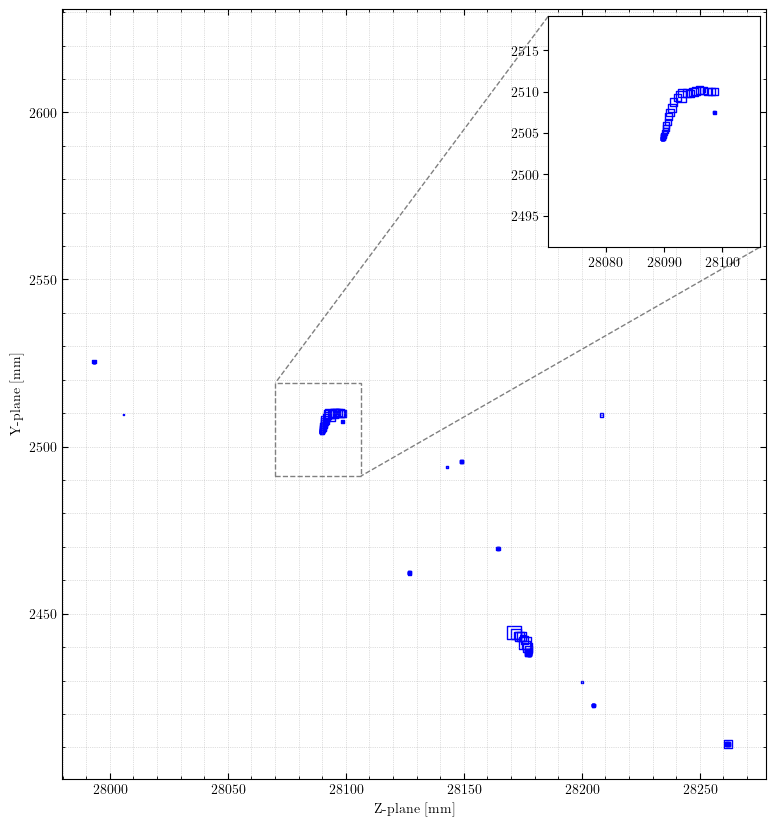

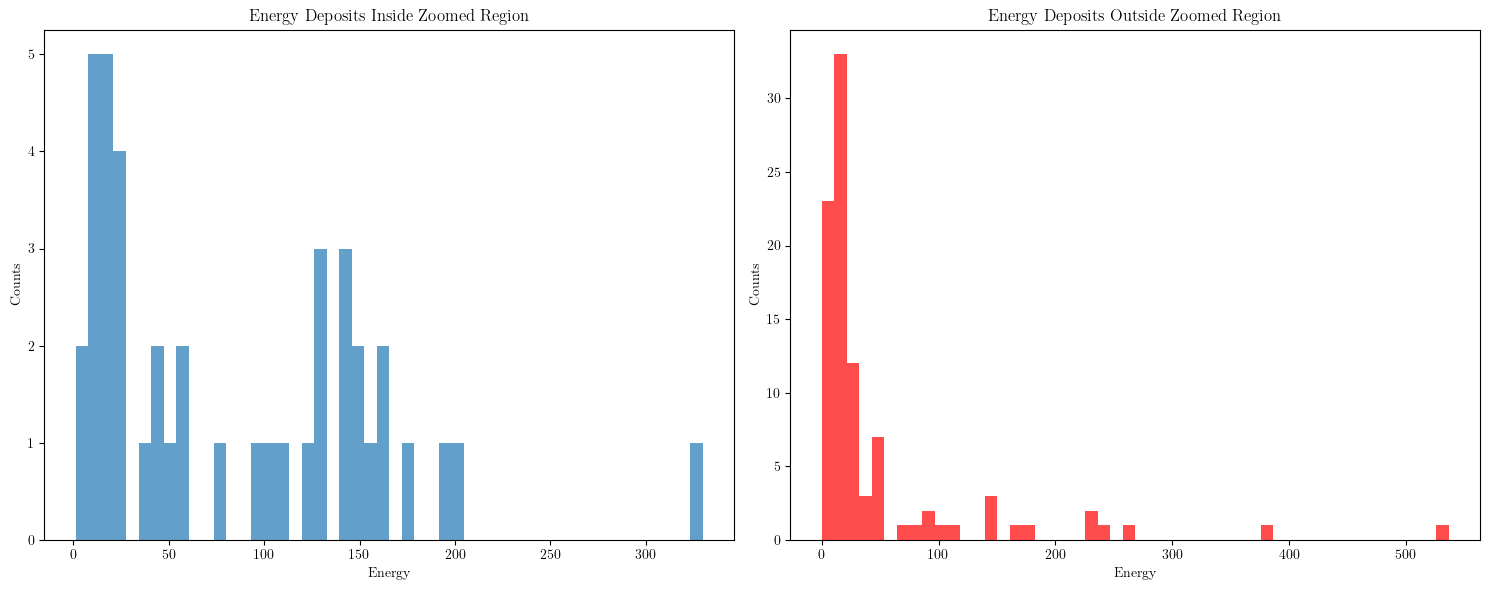

In [32]:
random_index = np.random.randint(1, 900)
print(random_index)
plot_event_display(data_dict, "marley_HEP_CC", random_index)

86


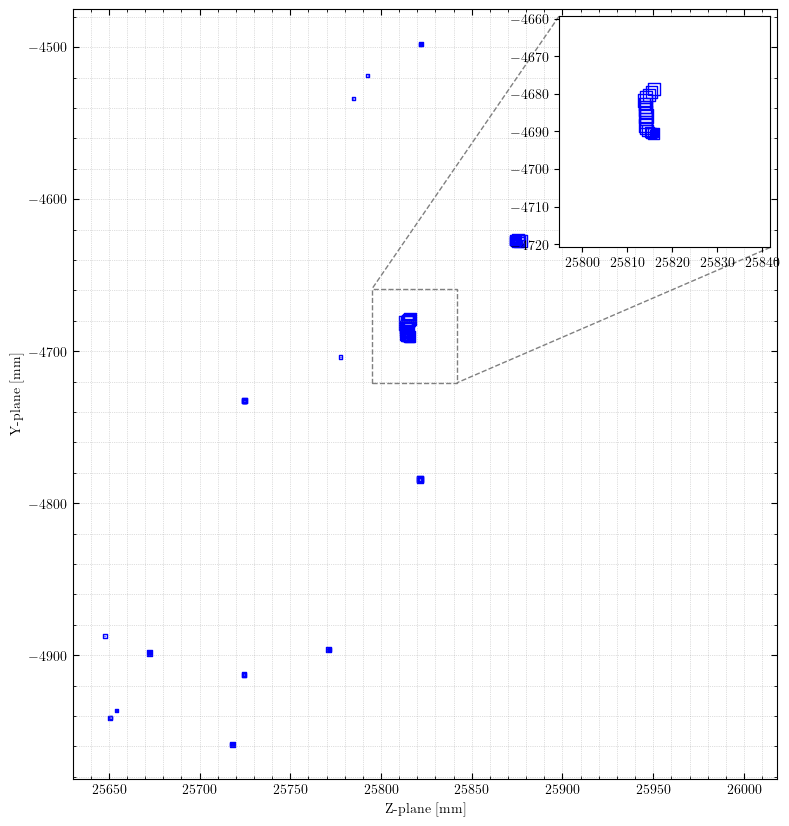

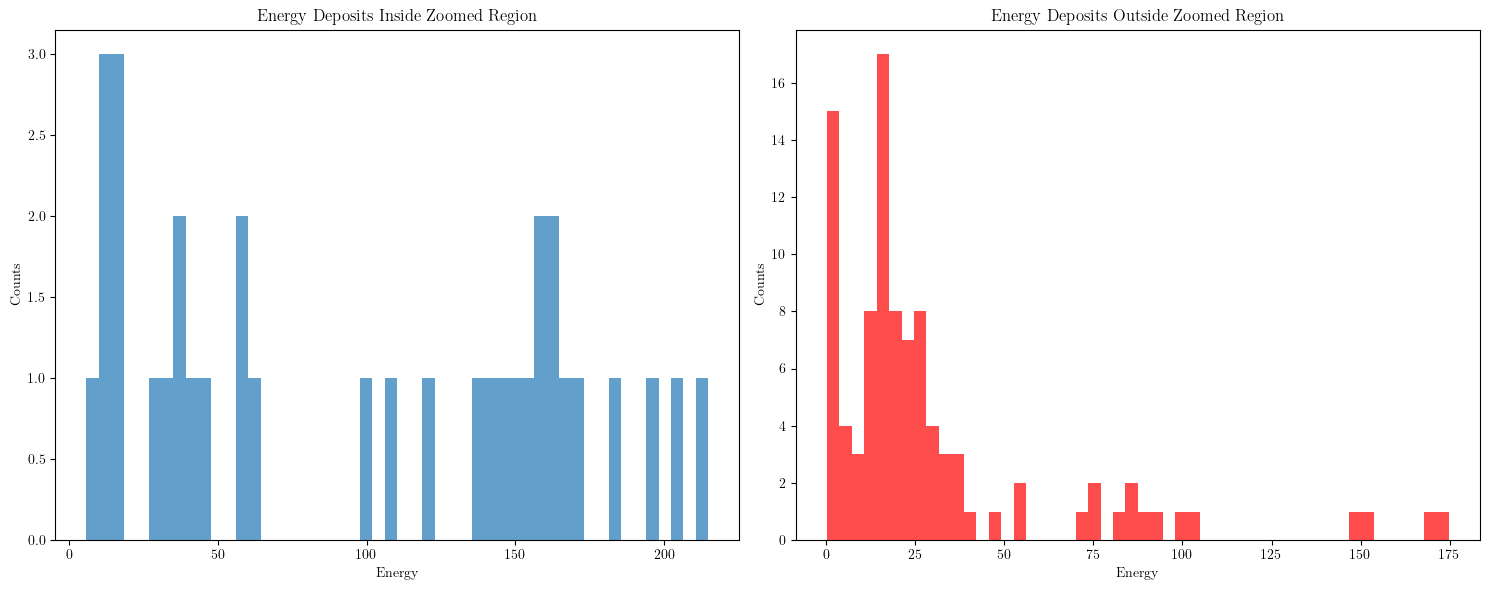

In [33]:
random_index = np.random.randint(1, 900)
print(random_index)
plot_event_display(data_dict, "marley_HEP_CC", random_index)